# RNN

In [102]:
import numpy as np
import pandas as pd
import plot_learning_curve as plotlearn
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [103]:
# Carrega os dados
data = pd.read_csv("DSL-StrongPasswordData.csv", header = 0)
# Reinicia o index
data = data.reset_index()
# Pega os IDs unicos campo 'subject'
unisub = list(data['subject'].unique())
# Cria ID numerico sequencial
mlist = [int(x) for x in range(len(unisub))]
# Vincula o Id numerico com o campo 'subject'
newvalue = dict(zip(unisub, mlist))
# Exibe dados tratados
data['subject'] = data['subject'].map(newvalue)


# import some data to play with


# Divide o conjunto de dados utilizando a proporção 80:20
train, test = train_test_split(data, test_size = 0.2)

#iris = datasets.load_iris()

features = list(data.columns[2:])

X = train[features].values
y = train['subject'].values


In [104]:
net = MLPClassifier(hidden_layer_sizes=(300, ),max_iter=600)


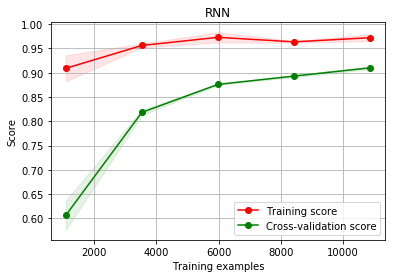

In [105]:
title = "RNN"
plotlearn.plot_learning_curve(net, title, X, y)

plt.show()

In [106]:
net.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [107]:
x_test = test[features]
y_test = test['subject']
# predict the output using the test data on the learned model
predicted_output = net.predict(x_test)



In [108]:
model_accuracy = metrics.accuracy_score(y_test, predicted_output)
model_accuracy

0.92696078431372553